In [1]:
import darts_advisor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

How accurate is our player?

pdd --> probability of hittng double when aming for double
pds --> probability of hittng single when aming for double
ptt --> probability of hittng triple when aming for triple
pbb --> probability of hittng bull when aming for bull
pbob --> probability of hittng outer-bull when aming for bull

Simplified assumptions on accuracy (can't hit neighbours, same for all numbers, not blocked by previous darts ect


In [3]:
a = {
'pdd': 0.45,
'pds' : 0.325,
'ptt' : 0.4,
'pbb' : 0.42,
'pbob' : 0.4,
}

 Find optimal strategies for this player

In [11]:
p = darts_advisor.Player(a)
p.strategies.head()

,throw 1,throw 2,throw 3
0,finished,finished,finished
1,bust,bust,bust
2,double 1,double 1,double 1
3,single 1,single 1,single 1
4,double 2,double 2,double 2


Plot the expected finish times

In [7]:
plot_df = pd.melt(pd.DataFrame(data=p.finish_times.T).reset_index(),id_vars='index').rename(columns={'index':'score',
                                                                                       'value':'finish time',
                                                                                       'variable':'Throw'})
plot_df['Throw'] = 'Throw ' +(plot_df['Throw']+1).astype(str)

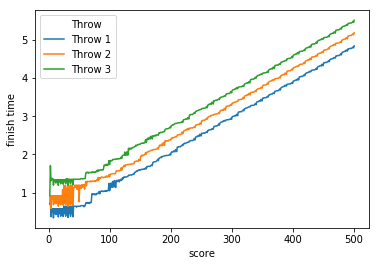

In [8]:
sns.lineplot(data=plot_df[plot_df['score']>=2],x='score',y='finish time',hue='Throw')

In [9]:
p.find_optimal_strategy(50,2)

{'strategy': 'single 18', 'expectation': 0.9329114182983953}

In [10]:
p.find_average()

103.48155125584853